<a href="https://colab.research.google.com/github/bodejan/computer-vision/blob/main/notebook/01_MTF_del_sistema_de_visi%C3%B3n_humano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. MTF del sistema de visión humano

http://lapi.fi-p.unam.mx/wp-content/uploads/Practica_1_IntroVision.pdf

1. Cálculo de la MTF
2. Estímulo visual
3. Observaciones y frecuencia de máxima sensibilidad

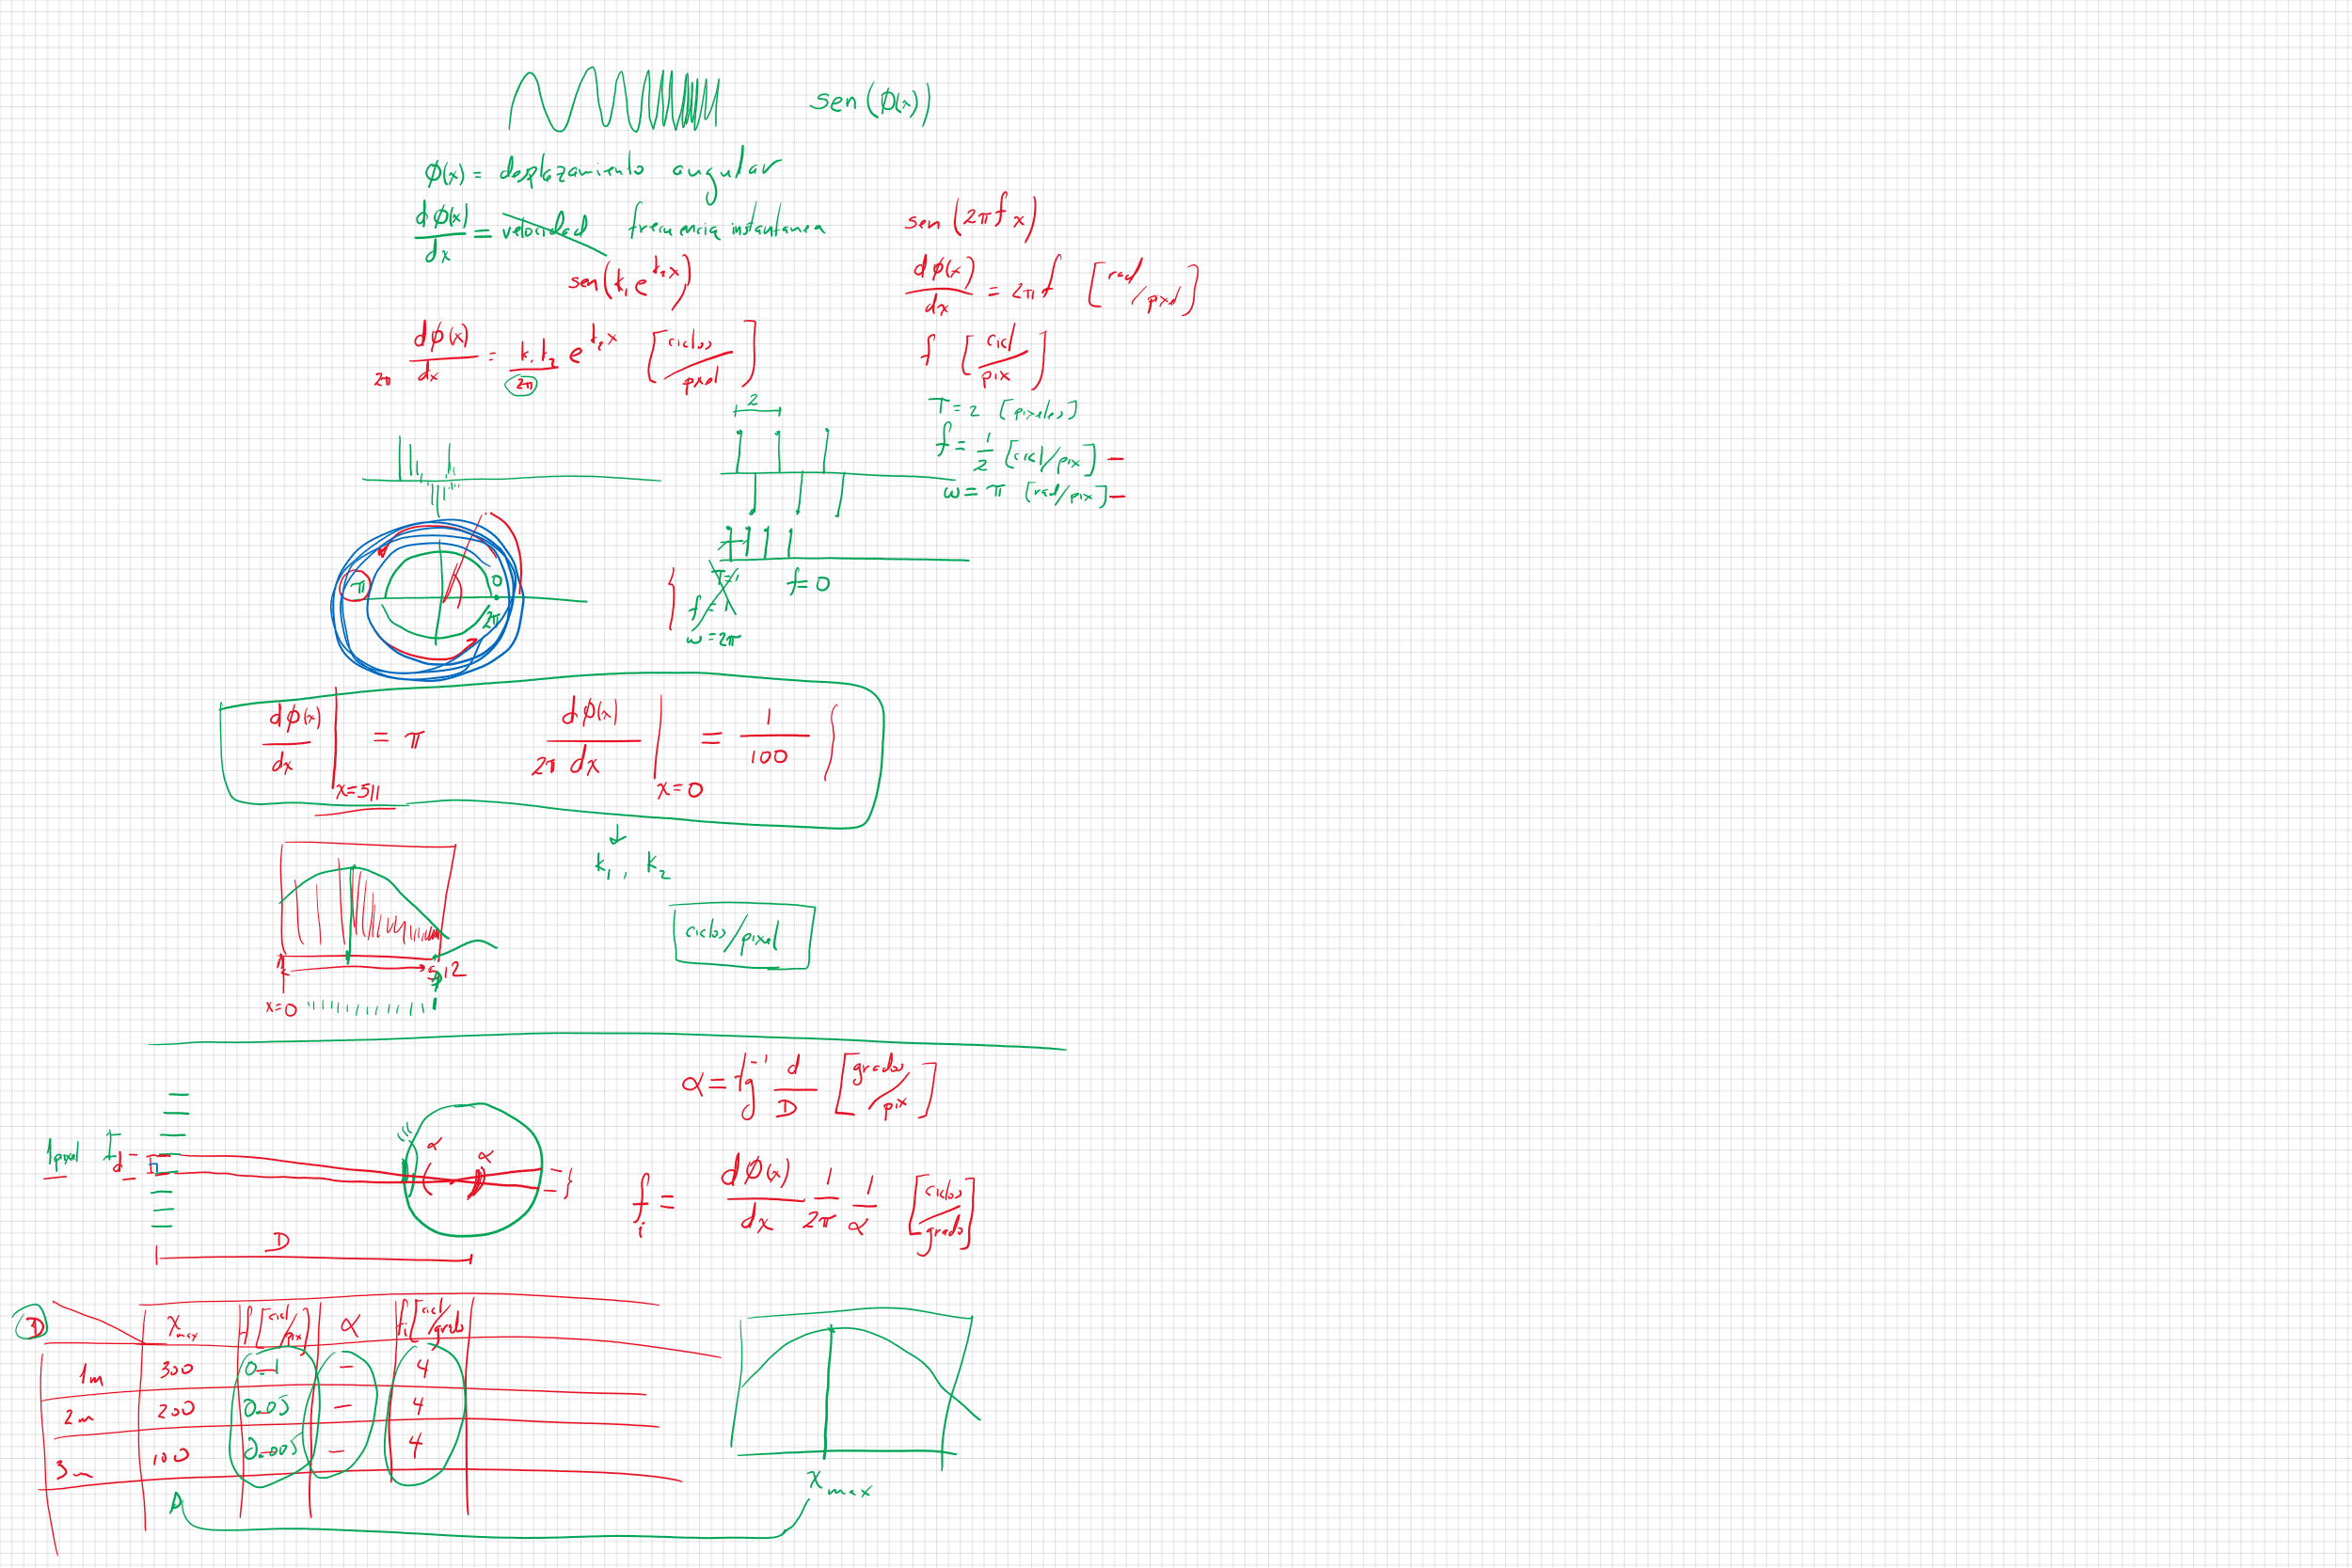

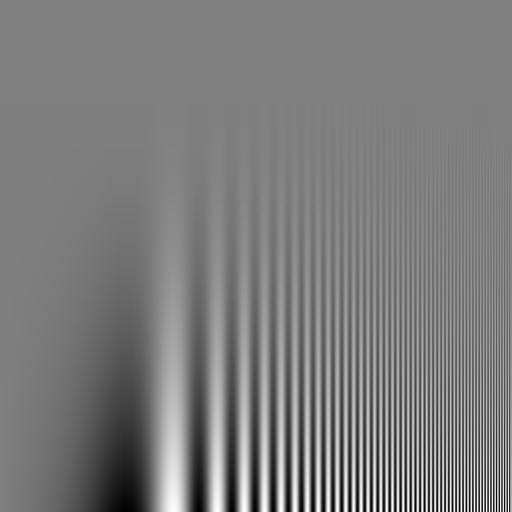

## 1. Cálculo de la MTF

Especificamos una senoidal con un barrido de frecuencia exponencial en el eje horizontal ($f(x)$) para la luminosidad y una atenuación exponencial negativa del contraste en la dirección vertical ($f(y)$).



$$MTF(x, y) = f(x) \cdot f(y) \quad \text{(1)}$$

$$f(x) = \sin(\phi(x)) \quad \text{(2)}$$

$$\phi(x) = k_1 \cdot e^{k_2 \cdot x} \quad \text{(3)}$$

$$f(y) = e^{-k_3 \cdot y} \quad \text{(4)}$$

A continuación derivamos los parámetros $k_1, k_2,k_3$.


La derivada de (3) es:

$$\frac{d\phi(x)}{dx} = k_1 \cdot k_2 \cdot e^{k_2 \cdot x} \quad \text{(4)}$$

Ademas sabemos que:

$$\frac{d\phi(0)}{dx} = \frac{2 \cdot \pi}{N_i} \quad \text{(4a)}$$

$$\frac{d\phi(511)}{dx} = 0.9999 \cdot \pi \quad \text{(4b)}$$

(Frecuencia incial y final)

Asi podemos establecer la siguiente ecuación:

$$\frac{d\phi(0)}{dx} = k_1 \cdot k_2 \cdot e^{k_2 \cdot 0} = k_1 \cdot k_2 = \frac{2 \cdot \pi}{N_i} \quad \text{(5)}$$

$$\frac{d\phi(511)}{dx} = k_1 \cdot k_2 \cdot e^{k_2 \cdot 511} = 0.9999 \cdot \pi \quad \text{(6)}$$


Resolvemos el sistema de ecuaciones (7) y (8) para encontrar $k_1, k_2$

(7) para $k_1$ nos da: $$k_1 = \frac{2 \cdot \pi}{N_i \cdot k_2} \quad \text{(5a)}$$

Sustituyendo el valor de $k_1$ en (6):

$$\frac{2 \cdot \pi}{N_i \cdot k_2} \cdot k_2 \cdot e^{k_2 \cdot 511} = 0.9999 \cdot \pi \quad \text{(7)}$$

Simplificando

$$\frac{2}{N_i} \cdot e^{k_2 \cdot 511} = 0.9999 \quad \text{(7a)}$$

Resolviendo (7a) para $k_2$

$$k_2 = \frac{\ln(0.9999 \cdot N_i /2)}{511} \quad \text{(7b)}$$

Sustituyendo el valor de $k_2$ en (5a):

$$
k_1 = \frac{2 \cdot \pi}{N_i \cdot \left(\frac{\ln(0.9999 \cdot \frac{N_i}{2})}{511}\right)} \quad \text{(8)}
$$

Simplificando

$$
k_1 = \frac{1022 \cdot \pi}{N_i \cdot \ln(0.9999 \cdot \frac{N_i}{2})} \quad \text{(8a)}
$$


<!-- Usamos $N_i=100$ como consejo practico del profesor.

$$
k_2 = \frac{\ln(45)}{511} ≈ 0.0011574 \quad \text{(7c)}
$$

$$
k_1 = \frac{10.22 \cdot \pi}{\ln(45)} ≈ 10.2215 \quad \text{(8b)}
$$ -->


El parametro $k_3$ es un parametro libre.

Ultilizamos los valores derivados $k_1, k_2$ (con respecto a $N_i$) para calcular la MTF y crear un estimulo visual.

Para ello probamos diferentes valores de $N_1$ y $k_3$.

## 2. Estímulo visual

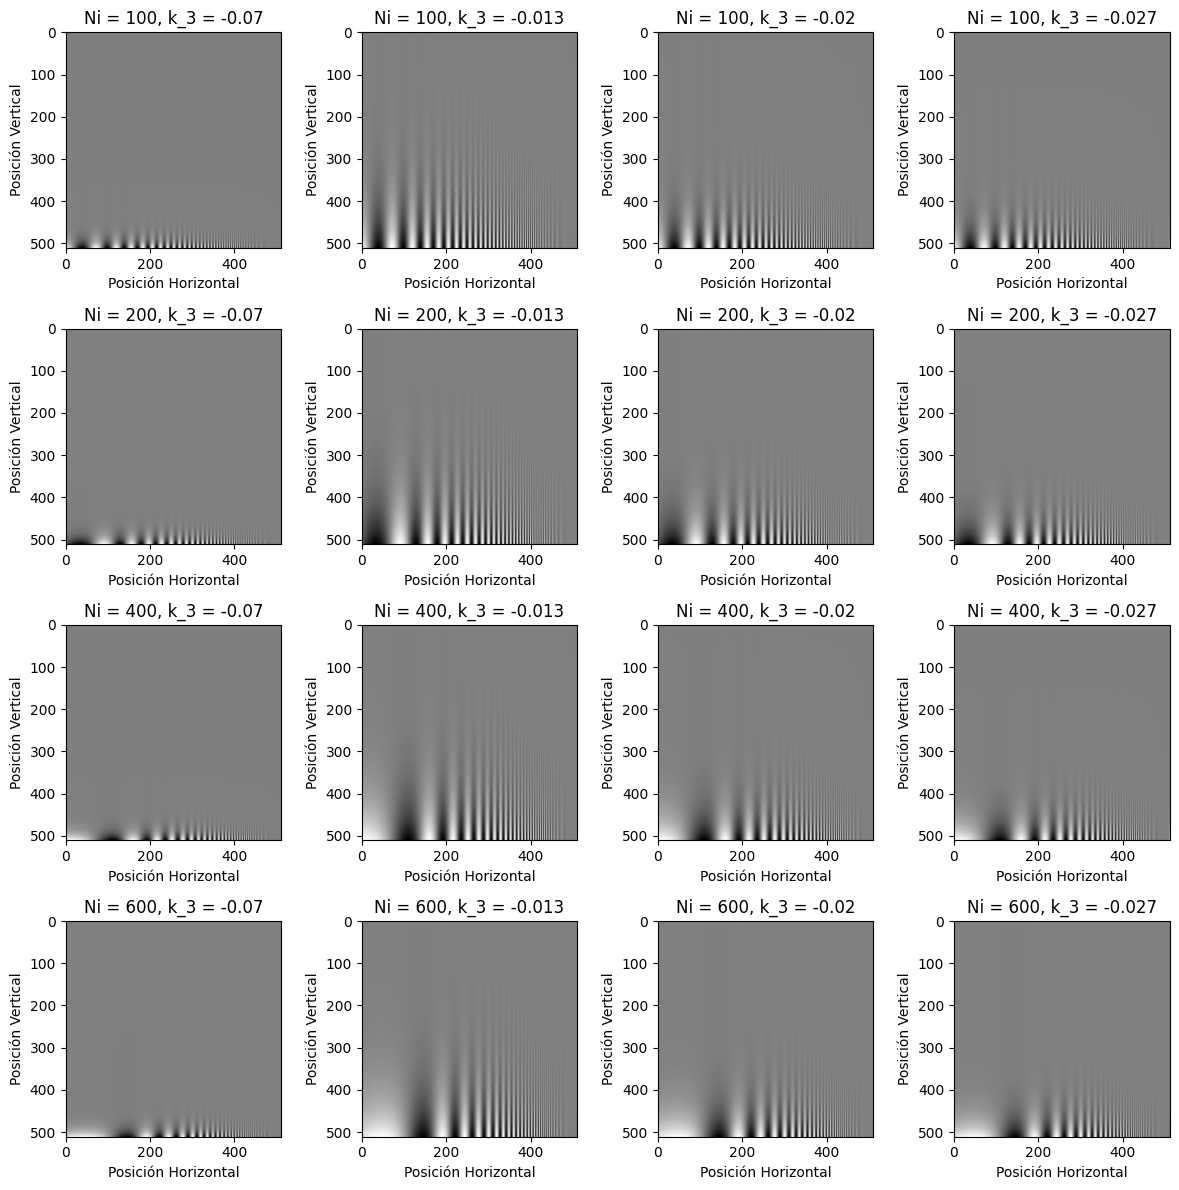

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
altura = 511
ancho = 511
fa=.999999999

# Valores de Ni y k_3 para iterar
ni_values = [100, 200, 400, 600]
k3_values = [-0.07, -0.013, -0.02, -0.027]

fig, axes = plt.subplots(len(ni_values), len(k3_values), figsize=(12, 12))

for i, Ni in enumerate(ni_values):
    for j, k_3 in enumerate(k3_values):
        k_1 = (1022*np.pi)/(Ni*np.log(fa*Ni/2))
        k_2 = np.log(fa*Ni/2)/511

        # Generar coordenadas para la imagen
        x = np.linspace(0, ancho, ancho+1)
        y = np.linspace(0, altura, altura+1)

        # Generar matrices de coordenadas para las frecuencias en el eje horizontal y la atenuación en el eje vertical
        xx, yy = np.meshgrid(x, y)

        # Generar la función senoidal con barrido de frecuencia y atenuación vertical
        f_x = np.sin(k_1*np.exp(k_2*xx))
        f_y = np.exp(-k_3*yy)

        # Aplicar la atenuación a la senoidal
        mtf = f_x * f_y

        # Mostrar la imagen generada en el subplot correspondiente
        ax = axes[i, j]
        ax.imshow(mtf, cmap='gray', origin='upper', extent=[0, ancho, altura, 0])
        ax.set_title(f'Ni = {Ni}, k_3 = {k_3}')
        ax.set_xlabel('Posición Horizontal')
        ax.set_ylabel('Posición Vertical')

# Ajustar el espacio entre los subplots
plt.tight_layout()
plt.show()


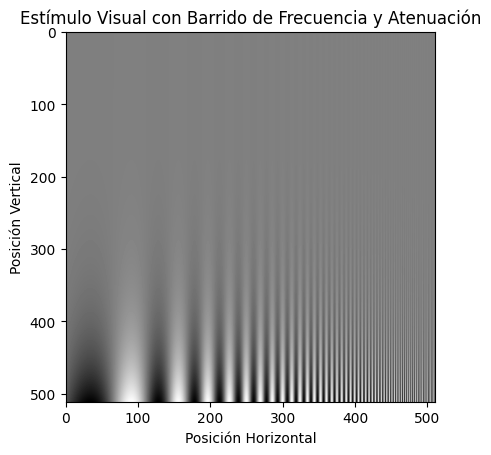

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
altura = 511
ancho = 511
Ni=200
fa=.999999999
k_1=(1024*np.pi)/(Ni*np.log(fa*Ni/2))
k_2=np.log(fa*Ni/2)/511
k_3=-0.0145

# Generar coordenadas para la imagen
x = np.linspace(0, ancho, ancho+1)
y = np.linspace(0, altura, altura+1)

# Generar matrices de coordenadas para las frecuencias en el eje horizontal y la atenuación en el eje vertical
xx, yy = np.meshgrid(x, y)

# Generar la función senoidal con barrido de frecuencia y atenuación vertical
f_x = np.sin(k_1*np.exp(k_2*xx))
f_y = np.exp(-k_3*yy)

# Aplicar la atenuación a la senoidal
mtf = f_x * f_y

# Mostrar la imagen generada
plt.imshow(mtf, cmap='gray', origin='upper', extent=[0, ancho, altura, 0])
plt.title('Estímulo Visual con Barrido de Frecuencia y Atenuación')
plt.xlabel('Posición Horizontal')
plt.ylabel('Posición Vertical')
plt.show()

## 3. Observaciones y frecuencia de máxima sensibilidad

### Formulas

Recordamos las formulas derivadas en _1. Cálculo de la MTF_. Además derivamos las formulas para $freq_{max}(x) [\frac{ciclo}{pix}]$, $freq_{max}(x) [\frac{ciclo}{grado}]$, y $\alpha$.



$$\frac{d\phi(x)}{dx} = k_1 \cdot k_2 \cdot e^{k_2 \cdot x} \quad \text{(1)}$$

$$
k_1 = \frac{1022 \cdot \pi}{N_i \cdot \ln(0.9 \cdot \frac{N_i}{2})} \quad \text{(2)}
$$

$$k_2 = \frac{\ln(0.9 \cdot N_i /2)}{511} \quad \text{(3)}$$


$$freq_{max}(x) [\frac{ciclo}{pix}] = \frac{d\phi(x)}{dx} \frac{1}{2 ⋅ \pi} \quad \text{(4)}$$

$$freq_{max}(x) [\frac{ciclo}{grado}] = \frac{d\phi(x)}{dx} \frac{1}{2 ⋅ \pi} \frac{1}{α} \quad \text{(5)}$$

 $$ \alpha ≈ \tan^{-1} \left( \frac{d}{D} \right) \quad \text{(6)}$$

In [ ]:
import numpy as np
import math

Ni=200
fa=.999999999
k_1=(1024*np.pi)/(Ni*np.log(fa*Ni/2))
k_2=np.log(fa*Ni/2)/511
k_3=-0.0145

def calculate_d_phi(x):
    return k_1 * k_2 * np.exp(k_2*x)

def calculate_alpha(d, D):
    a = math.atan(d/D)
    a = math.degrees(a)
    return a

def calculate_freq_max_ciclo_pix(x):
    return calculate_d_phi(x) * (1 / (2 * np.pi))

def calculate_freq_max_ciclo_grado(x, d, D):
    return calculate_freq_max_ciclo_pix(x) * (1 / calculate_alpha(d, D))

def calculate_print_table_row(x, D, name):
    d = 0.32 / 512
    freq_max_ciclo_pix = calculate_freq_max_ciclo_pix(x)
    alpha = calculate_alpha(d, D)
    freq_max_ciclo_grado = calculate_freq_max_ciclo_grado(x, d, D)

    # Print the calculated values in a formatted table row
    print(f"| {D:6.0f} | {x:5.0f} | {freq_max_ciclo_pix:14.4f} | {alpha:11.4f} | {freq_max_ciclo_grado:16.4f} | {name:^10s} |")

# Create the table header
print("|  D [m] |x [p.]|freq [c./p.]|α [g./p.]|freq [c./g.]| estudiante |")
print("| ------ | ----- | -------------- | ----------- | ---------------- | ---------- |")

# Observaciones x, d, D
# e.g.,
# Jan

calculate_print_table_row(297, 1, 'Jan')
calculate_print_table_row(247, 2, 'Jan')
calculate_print_table_row(260, 3, 'Jan')
print("| ------ | ----- | -------------- | ----------- | ---------------- | ---------- |")

# Beto
calculate_print_table_row(276,  1, 'Beto')
calculate_print_table_row(231,  2, 'Beto')
calculate_print_table_row(142,  3, 'Beto')
print("| ------ | ----- | -------------- | ----------- | ---------------- | ---------- |")

# Leon
calculate_print_table_row(320,  1, 'Leon')
calculate_print_table_row(288,  2, 'Leon')
calculate_print_table_row(195,  3, 'Leon')
print("| ------ | ----- | -------------- | ----------- | ---------------- | ---------- |")


|  D [m] |x [p.]|freq [c./p.]|α [g./p.]|freq [c./g.]| estudiante |
| ------ | ----- | -------------- | ----------- | ---------------- | ---------- |
|      1 |   297 |         0.0728 |      0.0358 |           2.0335 |    Jan     |
|      2 |   247 |         0.0464 |      0.0179 |           2.5917 |    Jan     |
|      3 |   260 |         0.0522 |      0.0119 |           4.3707 |    Jan     |
| ------ | ----- | -------------- | ----------- | ---------------- | ---------- |
|      1 |   276 |         0.0603 |      0.0358 |           1.6829 |    Beto    |
|      2 |   231 |         0.0402 |      0.0179 |           2.2437 |    Beto    |
|      3 |   142 |         0.0180 |      0.0119 |           1.5091 |    Beto    |
| ------ | ----- | -------------- | ----------- | ---------------- | ---------- |
|      1 |   320 |         0.0896 |      0.0358 |           2.5019 |    Leon    |
|      2 |   288 |         0.0671 |      0.0179 |           3.7501 |    Leon    |
|      3 |   195 |         0.02